In [1]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
# X_train_empty = np.empty((X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))
# X_test_empty = np.empty((X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train = np.broadcast_to(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))
X_test = np.broadcast_to(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))
X_train.shape

(1649, 64, 64, 3)

In [23]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [24]:
for layers in (vggmodel.layers)[:19]:
    layers.trainable = False

In [6]:
new_X_train = vggmodel.predict(X_train)
new_X_test = vggmodel.predict(X_test)

In [7]:
new_X_train.shape

(1649, 2, 2, 512)

In [25]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout

model_final = Sequential()
model_final.add(Flatten(input_shape=(2, 2, 512)))
model_final.add(Dense(10, activation="softmax"))

In [26]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist = model_final.fit(x=new_X_train, y=y_train, epochs= 1000, validation_data= (new_X_test, y_test))

Train on 1649 samples, validate on 413 samples
Epoch 1/1000
1649/1649 [==============================] - 1s 728us/step - loss: 2.3492 - acc: 0.1098 - val_loss: 2.2672 - val_acc: 0.1622
Epoch 2/1000
1649/1649 [==============================] - 0s 198us/step - loss: 2.2518 - acc: 0.1662 - val_loss: 2.2083 - val_acc: 0.2542
Epoch 3/1000
1649/1649 [==============================] - 0s 202us/step - loss: 2.1914 - acc: 0.2511 - val_loss: 2.1507 - val_acc: 0.3148
Epoch 4/1000
1649/1649 [==============================] - 0s 236us/step - loss: 2.1323 - acc: 0.3190 - val_loss: 2.0991 - val_acc: 0.3196
Epoch 5/1000
1649/1649 [==============================] - 0s 202us/step - loss: 2.0769 - acc: 0.3675 - val_loss: 2.0427 - val_acc: 0.3995
Epoch 6/1000
1649/1649 [==============================] - 0s 187us/step - loss: 2.0248 - acc: 0.4057 - val_loss: 1.9960 - val_acc: 0.4625
Epoch 7/1000
1649/1649 [==============================] - 0s 194us/step - loss: 1.9760 - acc: 0.4621 - val_loss: 1.9492 - val

1649/1649 [==============================] - 0s 226us/step - loss: 1.0424 - acc: 0.7799 - val_loss: 1.0765 - val_acc: 0.7385
Epoch 60/1000
1649/1649 [==============================] - 0s 195us/step - loss: 1.0355 - acc: 0.7780 - val_loss: 1.0698 - val_acc: 0.7458
Epoch 61/1000
1649/1649 [==============================] - 0s 193us/step - loss: 1.0279 - acc: 0.7859 - val_loss: 1.0642 - val_acc: 0.7458
Epoch 62/1000
1649/1649 [==============================] - 0s 203us/step - loss: 1.0218 - acc: 0.7708 - val_loss: 1.0564 - val_acc: 0.7554
Epoch 63/1000
1649/1649 [==============================] - 0s 198us/step - loss: 1.0146 - acc: 0.7799 - val_loss: 1.0508 - val_acc: 0.7530
Epoch 64/1000
1649/1649 [==============================] - 0s 200us/step - loss: 1.0085 - acc: 0.7811 - val_loss: 1.0430 - val_acc: 0.7627
Epoch 65/1000
1649/1649 [==============================] - 0s 195us/step - loss: 1.0032 - acc: 0.7817 - val_loss: 1.0389 - val_acc: 0.7482
Epoch 66/1000
1649/1649 [================

Epoch 118/1000
1649/1649 [==============================] - 0s 207us/step - loss: 0.7833 - acc: 0.8175 - val_loss: 0.8290 - val_acc: 0.7966
Epoch 119/1000
1649/1649 [==============================] - 0s 195us/step - loss: 0.7798 - acc: 0.8290 - val_loss: 0.8210 - val_acc: 0.8063
Epoch 120/1000
1649/1649 [==============================] - 0s 198us/step - loss: 0.7781 - acc: 0.8253 - val_loss: 0.8189 - val_acc: 0.8111
Epoch 121/1000
1649/1649 [==============================] - 0s 209us/step - loss: 0.7750 - acc: 0.8217 - val_loss: 0.8179 - val_acc: 0.8039
Epoch 122/1000
1649/1649 [==============================] - 0s 206us/step - loss: 0.7727 - acc: 0.8205 - val_loss: 0.8143 - val_acc: 0.8111
Epoch 123/1000
1649/1649 [==============================] - 0s 204us/step - loss: 0.7695 - acc: 0.8266 - val_loss: 0.8134 - val_acc: 0.8039
Epoch 124/1000
1649/1649 [==============================] - 0s 189us/step - loss: 0.7682 - acc: 0.8229 - val_loss: 0.8077 - val_acc: 0.8087
Epoch 125/1000
1649/

1649/1649 [==============================] - 0s 206us/step - loss: 0.6601 - acc: 0.8514 - val_loss: 0.7036 - val_acc: 0.8208
Epoch 177/1000
1649/1649 [==============================] - 0s 181us/step - loss: 0.6584 - acc: 0.8532 - val_loss: 0.7036 - val_acc: 0.8208
Epoch 178/1000
1649/1649 [==============================] - 0s 172us/step - loss: 0.6572 - acc: 0.8472 - val_loss: 0.7051 - val_acc: 0.8208
Epoch 179/1000
1649/1649 [==============================] - 0s 173us/step - loss: 0.6549 - acc: 0.8484 - val_loss: 0.7008 - val_acc: 0.8232
Epoch 180/1000
1649/1649 [==============================] - 0s 188us/step - loss: 0.6540 - acc: 0.8526 - val_loss: 0.7033 - val_acc: 0.8281
Epoch 181/1000
1649/1649 [==============================] - 0s 177us/step - loss: 0.6523 - acc: 0.8472 - val_loss: 0.6992 - val_acc: 0.8232
Epoch 182/1000
1649/1649 [==============================] - 0s 174us/step - loss: 0.6507 - acc: 0.8563 - val_loss: 0.6965 - val_acc: 0.8184
Epoch 183/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 185us/step - loss: 0.5822 - acc: 0.8642 - val_loss: 0.6289 - val_acc: 0.8354
Epoch 235/1000
1649/1649 [==============================] - 0s 194us/step - loss: 0.5818 - acc: 0.8642 - val_loss: 0.6280 - val_acc: 0.8354
Epoch 236/1000
1649/1649 [==============================] - 0s 194us/step - loss: 0.5803 - acc: 0.8672 - val_loss: 0.6256 - val_acc: 0.8378
Epoch 237/1000
1649/1649 [==============================] - 0s 190us/step - loss: 0.5795 - acc: 0.8660 - val_loss: 0.6280 - val_acc: 0.8354
Epoch 238/1000
1649/1649 [==============================] - 0s 194us/step - loss: 0.5785 - acc: 0.8654 - val_loss: 0.6265 - val_acc: 0.8426
Epoch 239/1000
1649/1649 [==============================] - 0s 190us/step - loss: 0.5777 - acc: 0.8666 - val_loss: 0.6227 - val_acc: 0.8402
Epoch 240/1000
1649/1649 [==============================] - 0s 188us/step - loss: 0.5766 - acc: 0.8702 - val_loss: 0.6235 - val_acc: 0.8305
Epoch 241/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 285us/step - loss: 0.5284 - acc: 0.8763 - val_loss: 0.5759 - val_acc: 0.8571
Epoch 293/1000
1649/1649 [==============================] - 0s 215us/step - loss: 0.5273 - acc: 0.8787 - val_loss: 0.5744 - val_acc: 0.8596
Epoch 294/1000
1649/1649 [==============================] - 0s 257us/step - loss: 0.5269 - acc: 0.8805 - val_loss: 0.5742 - val_acc: 0.8596
Epoch 295/1000
1649/1649 [==============================] - 0s 208us/step - loss: 0.5261 - acc: 0.8793 - val_loss: 0.5750 - val_acc: 0.8523
Epoch 296/1000
1649/1649 [==============================] - 0s 186us/step - loss: 0.5250 - acc: 0.8775 - val_loss: 0.5747 - val_acc: 0.8475
Epoch 297/1000
1649/1649 [==============================] - 0s 183us/step - loss: 0.5248 - acc: 0.8775 - val_loss: 0.5717 - val_acc: 0.8571
Epoch 298/1000
1649/1649 [==============================] - 0s 192us/step - loss: 0.5243 - acc: 0.8745 - val_loss: 0.5694 - val_acc: 0.8620
Epoch 299/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 198us/step - loss: 0.4878 - acc: 0.8866 - val_loss: 0.5362 - val_acc: 0.8717
Epoch 351/1000
1649/1649 [==============================] - 0s 193us/step - loss: 0.4871 - acc: 0.8860 - val_loss: 0.5361 - val_acc: 0.8741
Epoch 352/1000
1649/1649 [==============================] - 0s 176us/step - loss: 0.4867 - acc: 0.8811 - val_loss: 0.5353 - val_acc: 0.8717
Epoch 353/1000
1649/1649 [==============================] - 0s 182us/step - loss: 0.4862 - acc: 0.8896 - val_loss: 0.5356 - val_acc: 0.8620
Epoch 354/1000
1649/1649 [==============================] - 0s 186us/step - loss: 0.4853 - acc: 0.8860 - val_loss: 0.5347 - val_acc: 0.8741
Epoch 355/1000
1649/1649 [==============================] - 0s 212us/step - loss: 0.4856 - acc: 0.8842 - val_loss: 0.5348 - val_acc: 0.8668
Epoch 356/1000
1649/1649 [==============================] - 0s 189us/step - loss: 0.4843 - acc: 0.8854 - val_loss: 0.5329 - val_acc: 0.8741
Epoch 357/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 177us/step - loss: 0.4556 - acc: 0.8975 - val_loss: 0.5048 - val_acc: 0.8838
Epoch 409/1000
1649/1649 [==============================] - 0s 174us/step - loss: 0.4554 - acc: 0.8939 - val_loss: 0.5050 - val_acc: 0.8838
Epoch 410/1000
1649/1649 [==============================] - 0s 173us/step - loss: 0.4544 - acc: 0.8957 - val_loss: 0.5040 - val_acc: 0.8838
Epoch 411/1000
1649/1649 [==============================] - 0s 202us/step - loss: 0.4539 - acc: 0.8981 - val_loss: 0.5051 - val_acc: 0.8789
Epoch 412/1000
1649/1649 [==============================] - 0s 189us/step - loss: 0.4537 - acc: 0.8945 - val_loss: 0.5055 - val_acc: 0.8789
Epoch 413/1000
1649/1649 [==============================] - 0s 206us/step - loss: 0.4530 - acc: 0.8975 - val_loss: 0.5041 - val_acc: 0.8789
Epoch 414/1000
1649/1649 [==============================] - 0s 223us/step - loss: 0.4524 - acc: 0.8963 - val_loss: 0.5018 - val_acc: 0.8789
Epoch 415/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 188us/step - loss: 0.4286 - acc: 0.9036 - val_loss: 0.4821 - val_acc: 0.8838
Epoch 467/1000
1649/1649 [==============================] - 0s 182us/step - loss: 0.4282 - acc: 0.9036 - val_loss: 0.4791 - val_acc: 0.8862
Epoch 468/1000
1649/1649 [==============================] - 0s 188us/step - loss: 0.4283 - acc: 0.9030 - val_loss: 0.4803 - val_acc: 0.8862
Epoch 469/1000
1649/1649 [==============================] - 0s 176us/step - loss: 0.4281 - acc: 0.9030 - val_loss: 0.4805 - val_acc: 0.8838
Epoch 470/1000
1649/1649 [==============================] - 0s 175us/step - loss: 0.4272 - acc: 0.9012 - val_loss: 0.4798 - val_acc: 0.8862
Epoch 471/1000
1649/1649 [==============================] - 0s 170us/step - loss: 0.4269 - acc: 0.9018 - val_loss: 0.4799 - val_acc: 0.8886
Epoch 472/1000
1649/1649 [==============================] - 0s 183us/step - loss: 0.4267 - acc: 0.9030 - val_loss: 0.4774 - val_acc: 0.8862
Epoch 473/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 196us/step - loss: 0.4066 - acc: 0.9066 - val_loss: 0.4598 - val_acc: 0.8886
Epoch 525/1000
1649/1649 [==============================] - 0s 214us/step - loss: 0.4066 - acc: 0.9084 - val_loss: 0.4602 - val_acc: 0.8910
Epoch 526/1000
1649/1649 [==============================] - 0s 197us/step - loss: 0.4060 - acc: 0.9066 - val_loss: 0.4573 - val_acc: 0.8910
Epoch 527/1000
1649/1649 [==============================] - 0s 241us/step - loss: 0.4057 - acc: 0.9078 - val_loss: 0.4589 - val_acc: 0.8886
Epoch 528/1000
1649/1649 [==============================] - 0s 270us/step - loss: 0.4056 - acc: 0.9078 - val_loss: 0.4573 - val_acc: 0.8910
Epoch 529/1000
1649/1649 [==============================] - 0s 272us/step - loss: 0.4047 - acc: 0.9084 - val_loss: 0.4571 - val_acc: 0.8910
Epoch 530/1000
1649/1649 [==============================] - 0s 211us/step - loss: 0.4046 - acc: 0.9066 - val_loss: 0.4566 - val_acc: 0.8910
Epoch 531/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 190us/step - loss: 0.3879 - acc: 0.9072 - val_loss: 0.4411 - val_acc: 0.8935
Epoch 583/1000
1649/1649 [==============================] - 0s 182us/step - loss: 0.3875 - acc: 0.9078 - val_loss: 0.4420 - val_acc: 0.8910
Epoch 584/1000
1649/1649 [==============================] - 0s 175us/step - loss: 0.3872 - acc: 0.9121 - val_loss: 0.4407 - val_acc: 0.8910
Epoch 585/1000
1649/1649 [==============================] - 0s 198us/step - loss: 0.3867 - acc: 0.9121 - val_loss: 0.4399 - val_acc: 0.8935
Epoch 586/1000
1649/1649 [==============================] - 0s 191us/step - loss: 0.3863 - acc: 0.9090 - val_loss: 0.4403 - val_acc: 0.8910
Epoch 587/1000
1649/1649 [==============================] - 0s 175us/step - loss: 0.3858 - acc: 0.9115 - val_loss: 0.4392 - val_acc: 0.8935
Epoch 588/1000
1649/1649 [==============================] - 0s 186us/step - loss: 0.3859 - acc: 0.9115 - val_loss: 0.4392 - val_acc: 0.8935
Epoch 589/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 175us/step - loss: 0.3712 - acc: 0.9145 - val_loss: 0.4252 - val_acc: 0.8959
Epoch 641/1000
1649/1649 [==============================] - 0s 176us/step - loss: 0.3706 - acc: 0.9121 - val_loss: 0.4266 - val_acc: 0.8935
Epoch 642/1000
1649/1649 [==============================] - 0s 172us/step - loss: 0.3711 - acc: 0.9127 - val_loss: 0.4256 - val_acc: 0.8959
Epoch 643/1000
1649/1649 [==============================] - 0s 173us/step - loss: 0.3701 - acc: 0.9145 - val_loss: 0.4238 - val_acc: 0.8935
Epoch 644/1000
1649/1649 [==============================] - 0s 172us/step - loss: 0.3697 - acc: 0.9121 - val_loss: 0.4243 - val_acc: 0.8935
Epoch 645/1000
1649/1649 [==============================] - 0s 165us/step - loss: 0.3694 - acc: 0.9145 - val_loss: 0.4245 - val_acc: 0.8910
Epoch 646/1000
1649/1649 [==============================] - 0s 190us/step - loss: 0.3695 - acc: 0.9151 - val_loss: 0.4239 - val_acc: 0.8959
Epoch 647/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 223us/step - loss: 0.3563 - acc: 0.9181 - val_loss: 0.4114 - val_acc: 0.8935
Epoch 699/1000
1649/1649 [==============================] - 0s 195us/step - loss: 0.3562 - acc: 0.9200 - val_loss: 0.4116 - val_acc: 0.8959
Epoch 700/1000
1649/1649 [==============================] - 0s 196us/step - loss: 0.3564 - acc: 0.9181 - val_loss: 0.4098 - val_acc: 0.8959
Epoch 701/1000
1649/1649 [==============================] - 0s 208us/step - loss: 0.3553 - acc: 0.9193 - val_loss: 0.4115 - val_acc: 0.8959
Epoch 702/1000
1649/1649 [==============================] - 0s 180us/step - loss: 0.3551 - acc: 0.9175 - val_loss: 0.4097 - val_acc: 0.8959
Epoch 703/1000
1649/1649 [==============================] - 0s 203us/step - loss: 0.3551 - acc: 0.9187 - val_loss: 0.4105 - val_acc: 0.8959
Epoch 704/1000
1649/1649 [==============================] - 0s 198us/step - loss: 0.3549 - acc: 0.9169 - val_loss: 0.4115 - val_acc: 0.8959
Epoch 705/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 194us/step - loss: 0.3431 - acc: 0.9212 - val_loss: 0.4005 - val_acc: 0.8959
Epoch 757/1000
1649/1649 [==============================] - 0s 184us/step - loss: 0.3430 - acc: 0.9224 - val_loss: 0.3985 - val_acc: 0.9007
Epoch 758/1000
1649/1649 [==============================] - 0s 211us/step - loss: 0.3427 - acc: 0.9206 - val_loss: 0.3981 - val_acc: 0.9007
Epoch 759/1000
1649/1649 [==============================] - 0s 198us/step - loss: 0.3425 - acc: 0.9206 - val_loss: 0.3996 - val_acc: 0.8959
Epoch 760/1000
1649/1649 [==============================] - 0s 198us/step - loss: 0.3426 - acc: 0.9200 - val_loss: 0.3982 - val_acc: 0.8983
Epoch 761/1000
1649/1649 [==============================] - 0s 193us/step - loss: 0.3421 - acc: 0.9212 - val_loss: 0.3987 - val_acc: 0.8959
Epoch 762/1000
1649/1649 [==============================] - 0s 192us/step - loss: 0.3416 - acc: 0.9224 - val_loss: 0.3979 - val_acc: 0.8983
Epoch 763/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 205us/step - loss: 0.3312 - acc: 0.9266 - val_loss: 0.3897 - val_acc: 0.8959
Epoch 815/1000
1649/1649 [==============================] - 0s 199us/step - loss: 0.3314 - acc: 0.9260 - val_loss: 0.3891 - val_acc: 0.8983
Epoch 816/1000
1649/1649 [==============================] - 0s 199us/step - loss: 0.3307 - acc: 0.9260 - val_loss: 0.3880 - val_acc: 0.8983
Epoch 817/1000
1649/1649 [==============================] - 0s 190us/step - loss: 0.3306 - acc: 0.9254 - val_loss: 0.3883 - val_acc: 0.8983
Epoch 818/1000
1649/1649 [==============================] - 0s 192us/step - loss: 0.3303 - acc: 0.9254 - val_loss: 0.3885 - val_acc: 0.8983
Epoch 819/1000
1649/1649 [==============================] - 0s 199us/step - loss: 0.3305 - acc: 0.9242 - val_loss: 0.3871 - val_acc: 0.9007
Epoch 820/1000
1649/1649 [==============================] - 0s 190us/step - loss: 0.3303 - acc: 0.9284 - val_loss: 0.3879 - val_acc: 0.8983
Epoch 821/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 175us/step - loss: 0.3205 - acc: 0.9284 - val_loss: 0.3792 - val_acc: 0.8983
Epoch 873/1000
1649/1649 [==============================] - 0s 179us/step - loss: 0.3204 - acc: 0.9290 - val_loss: 0.3781 - val_acc: 0.8983
Epoch 874/1000
1649/1649 [==============================] - 0s 188us/step - loss: 0.3202 - acc: 0.9284 - val_loss: 0.3791 - val_acc: 0.9007
Epoch 875/1000
1649/1649 [==============================] - 0s 192us/step - loss: 0.3204 - acc: 0.9309 - val_loss: 0.3785 - val_acc: 0.9007
Epoch 876/1000
1649/1649 [==============================] - 0s 175us/step - loss: 0.3200 - acc: 0.9278 - val_loss: 0.3769 - val_acc: 0.9007
Epoch 877/1000
1649/1649 [==============================] - 0s 176us/step - loss: 0.3196 - acc: 0.9297 - val_loss: 0.3773 - val_acc: 0.9007
Epoch 878/1000
1649/1649 [==============================] - 0s 184us/step - loss: 0.3196 - acc: 0.9284 - val_loss: 0.3802 - val_acc: 0.8983
Epoch 879/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 204us/step - loss: 0.3104 - acc: 0.9309 - val_loss: 0.3702 - val_acc: 0.9007
Epoch 931/1000
1649/1649 [==============================] - 0s 187us/step - loss: 0.3107 - acc: 0.9315 - val_loss: 0.3707 - val_acc: 0.9007
Epoch 932/1000
1649/1649 [==============================] - 0s 200us/step - loss: 0.3102 - acc: 0.9303 - val_loss: 0.3697 - val_acc: 0.9007
Epoch 933/1000
1649/1649 [==============================] - 0s 197us/step - loss: 0.3102 - acc: 0.9327 - val_loss: 0.3686 - val_acc: 0.9031
Epoch 934/1000
1649/1649 [==============================] - 0s 181us/step - loss: 0.3100 - acc: 0.9315 - val_loss: 0.3697 - val_acc: 0.9007
Epoch 935/1000
1649/1649 [==============================] - 0s 190us/step - loss: 0.3098 - acc: 0.9321 - val_loss: 0.3700 - val_acc: 0.9007
Epoch 936/1000
1649/1649 [==============================] - 0s 191us/step - loss: 0.3099 - acc: 0.9333 - val_loss: 0.3696 - val_acc: 0.8983
Epoch 937/1000
1649/1649 [=========

1649/1649 [==============================] - 0s 181us/step - loss: 0.3017 - acc: 0.9327 - val_loss: 0.3618 - val_acc: 0.9031
Epoch 989/1000
1649/1649 [==============================] - 0s 200us/step - loss: 0.3018 - acc: 0.9321 - val_loss: 0.3620 - val_acc: 0.9031
Epoch 990/1000
1649/1649 [==============================] - 0s 215us/step - loss: 0.3011 - acc: 0.9321 - val_loss: 0.3612 - val_acc: 0.9031
Epoch 991/1000
1649/1649 [==============================] - 0s 240us/step - loss: 0.3013 - acc: 0.9351 - val_loss: 0.3609 - val_acc: 0.9007
Epoch 992/1000
1649/1649 [==============================] - 0s 247us/step - loss: 0.3010 - acc: 0.9339 - val_loss: 0.3619 - val_acc: 0.9031
Epoch 993/1000
1649/1649 [==============================] - 0s 248us/step - loss: 0.3012 - acc: 0.9327 - val_loss: 0.3609 - val_acc: 0.9056
Epoch 994/1000
1649/1649 [==============================] - 0s 202us/step - loss: 0.3004 - acc: 0.9333 - val_loss: 0.3611 - val_acc: 0.9007
Epoch 995/1000
1649/1649 [=========

<IPython.core.display.Javascript object>


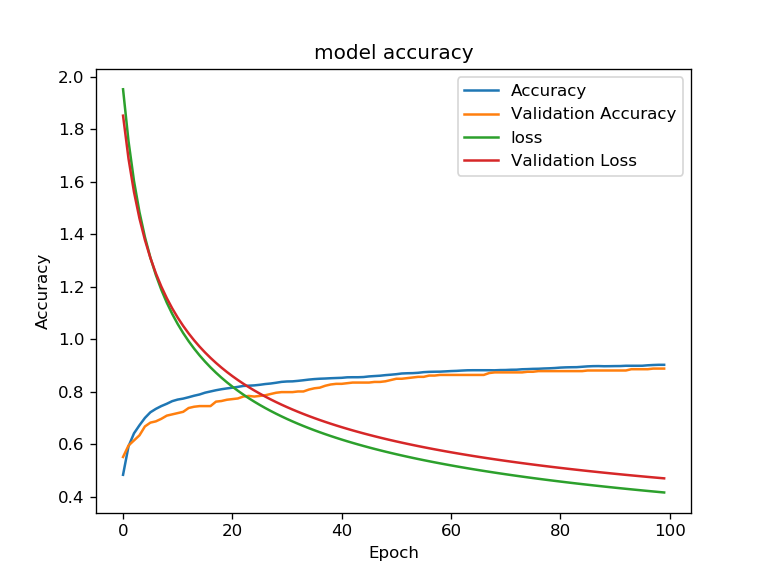

In [16]:
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

traindata = datagen.flow(new_X_train, y_train, batch_size=len(X_train))
testdata = datagen.flow(new_X_test, y_test, batch_size=len(X_test))

# traindata = datagen.flow(X_train, y_train)
# testdata = datagen.flow(X_test, y_test)

In [ ]:
# hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])